In [2]:
from sklearn.datasets import load_iris 
import pandas as pd
data=load_iris()
#print(data.DESCR)
df=pd.DataFrame(data['data'], columns=data['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# проверяем, что нет корреляции
df[['sepal length (cm)','sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


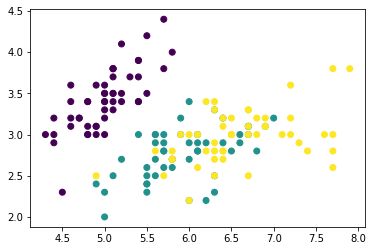

In [32]:
# смотрим на данные
import matplotlib.pyplot as plt
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=data.target)

In [17]:
df = df[['sepal length (cm)','sepal width (cm)']]
df_class=data.target

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df,df_class, test_size=0.25)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda.predict(x_test)

array([2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.8947368421052632

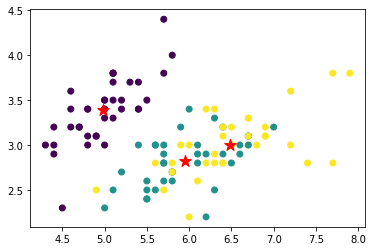

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

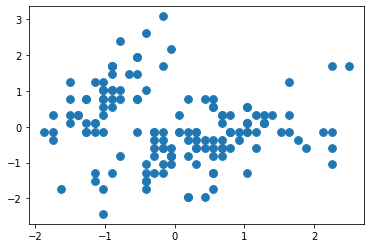

In [42]:
#нормализация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
plt.scatter(X_scaled[:,0], X_scaled[:,1], cmap='autumn', s=60)

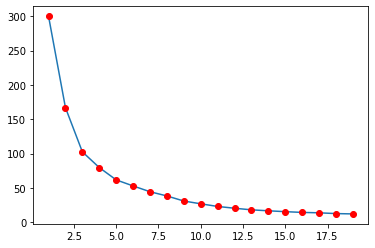

In [45]:
# метод локтя 
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')    

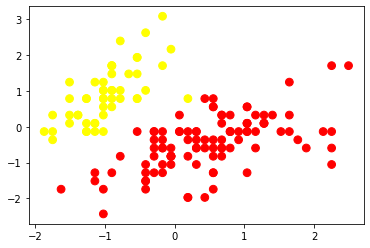

In [50]:
#Оптимальное число кластеров может быть рано 2
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)